# 3.  Codificación de variables

Conjunto de datos: titanic (incluido en seaborn)

Este conjunto de datos es excelente para trabajar con variables categóricas.

In [2]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [3]:
# Cargar el conjunto de datos
data = sns.load_dataset('titanic')

In [4]:
# Visualizar las primeras filas
print("Conjunto de datos Titanic:")
data.head()

Conjunto de datos Titanic:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# Seleccionar columnas categóricas
categorical_cols = ['sex', 'embarked', 'class']

In [6]:
# Codificar con LabelEncoder
label_encoder = LabelEncoder()
data['sex_label'] = label_encoder.fit_transform(data['sex'])

In [7]:
# Codificar con OneHotEncoder
onehot_encoder = pd.get_dummies(data['embarked'], prefix='embarked')

In [8]:
# Combinar con el conjunto original
data = pd.concat([data, onehot_encoder], axis=1)

# Ejercicios
Contesta las siguientes preguntas. Para cada pregunta, deberás escribir código que demostrará cómo llegaste al resultado. Crea gráficas en donde veas correcto.

### 1. ¿Qué diferencias encuentras entre LabelEncoder y OneHotEncoder?

=== Valores únicos por columna ===

Columna: sex
Únicos: ['male' 'female']
Conteos:
 sex
male      577
female    314
Name: count, dtype: int64

Columna: embarked
Únicos: ['S' 'C' 'Q' nan]
Conteos:
 embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

Columna: class
Únicos: ['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']
Conteos:
 class
Third     491
First     216
Second    184
Name: count, dtype: int64

Mapping LabelEncoder para 'sex':
  female -> 0
  male -> 1

Mapping LabelEncoder para 'class':
  First -> 0
  Second -> 1
  Third -> 2

Número de columnas:
  Original: 15
  Con LabelEncoder (se agregan columnas label): 17
  Con One-Hot Encoding: 19

Primeras filas - LabelEncoded (sex_label, class_label):
      sex  sex_label  class  class_label
0    male          1  Third            2
1  female          0  First            0
2  female          0  Third            2
3  female          0  First            0
4    male          1 

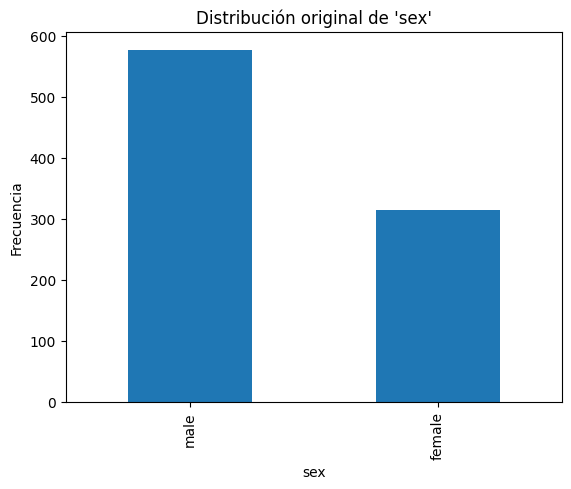

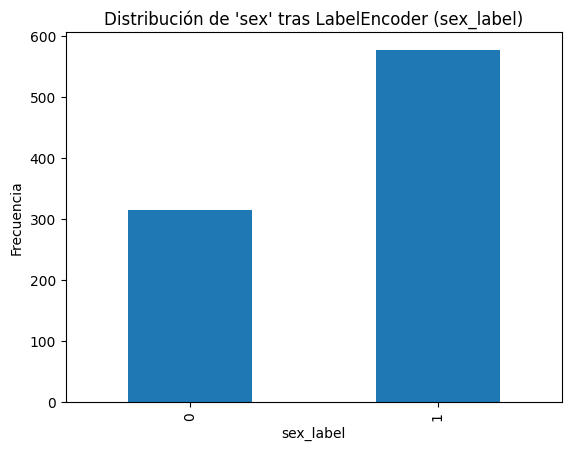

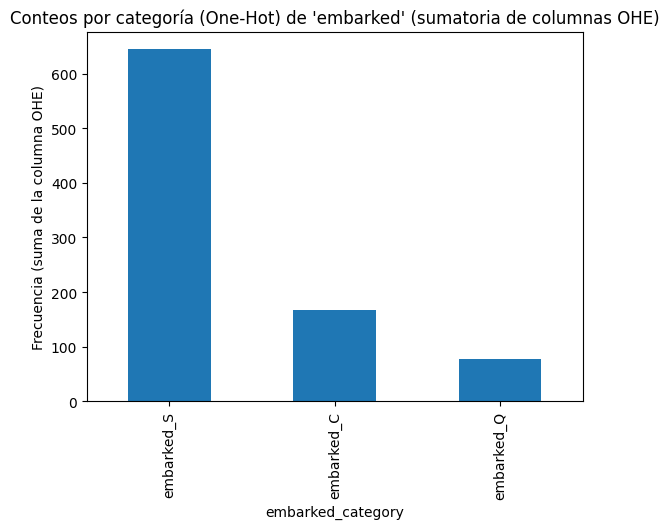


RESUMEN RÁPIDO:
- LabelEncoder:
  * Reemplaza la columna categórica por una columna numérica con etiquetas (0,1,2,...).
  * Ocupa menos columnas.
  * Introduce un orden implícito entre las categorías (p. ej. 0 < 1 < 2), lo cual puede ser problemático
    si la variable es nominal (sin orden).

- One-Hot Encoding:
  * Crea N columnas binarias (una por cada categoría).
  * No introduce orden implícito — cada categoría se representa independientemente.
  * Aumenta el número de columnas (problema cuando hay muchas categorías).



In [9]:
# Código que demuestra las diferencias entre LabelEncoder y OneHotEncoder
# Diferencias entre LabelEncoder y OneHotEncoder (código demostrativo)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns  # para cargar el dataset titanic

# 1) Cargar datos
data = sns.load_dataset('titanic')

# 2) Columnas a usar como ejemplo
cols = ['sex', 'embarked', 'class']

# 3) Mostrar valores únicos y conteos (originales)
print("=== Valores únicos por columna ===")
for c in cols:
    print(f"\nColumna: {c}")
    print("Únicos:", data[c].unique())
    print("Conteos:\n", data[c].value_counts(dropna=False))

# 4) Label Encoding de ejemplo (sex y class)
data_le = data.copy()
le_sex = LabelEncoder()
data_le['sex_label'] = le_sex.fit_transform(data_le['sex'].astype(str))
le_class = LabelEncoder()
data_le['class_label'] = le_class.fit_transform(data_le['class'].astype(str))

print("\nMapping LabelEncoder para 'sex':")
for cat, lab in zip(le_sex.classes_, range(len(le_sex.classes_))):
    print(f"  {cat} -> {lab}")

print("\nMapping LabelEncoder para 'class':")
for cat, lab in zip(le_class.classes_, range(len(le_class.classes_))):
    print(f"  {cat} -> {lab}")

# 5) One-Hot Encoding (pandas.get_dummies) para 'embarked' y 'class'
data_ohe = pd.get_dummies(data.copy(), columns=['embarked','class'], prefix=['embarked','class'], dummy_na=False)

# 6) Comparación del número de columnas antes/después
print("\nNúmero de columnas:")
print("  Original:", data.shape[1])
print("  Con LabelEncoder (se agregan columnas label):", data_le.shape[1])
print("  Con One-Hot Encoding:", data_ohe.shape[1])

# 7) Mostrar primeras filas para ver la transformación
print("\nPrimeras filas - LabelEncoded (sex_label, class_label):")
print(data_le[['sex','sex_label','class','class_label']].head())

print("\nPrimeras filas - One-Hot (columnas creadas):")
print(data_ohe.head().iloc[:, :12])   # mostrar solo primeras 12 columnas para no spamear

# ---------------------
# GRÁFICAS (una figura por gráfico, matplotlib)
# ---------------------

# A) Gráfico 1: distribución original de 'sex'
plt.figure()
data['sex'].value_counts().plot.bar()
plt.title("Distribución original de 'sex'")
plt.xlabel("sex")
plt.ylabel("Frecuencia")
plt.show()

# B) Gráfico 2: distribución tras LabelEncoder ('sex_label')
plt.figure()
# ordenamos por índice para que 0 y 1 correspondan a las etiquetas en orden
data_le['sex_label'].value_counts().sort_index().plot.bar()
plt.title("Distribución de 'sex' tras LabelEncoder (sex_label)")
plt.xlabel("sex_label")
plt.ylabel("Frecuencia")
plt.show()

# C) Gráfico 3: sumas de columnas One-Hot para 'embarked' (muestra cómo One-Hot distribuye la información)
ohe_embarked_cols = [c for c in data_ohe.columns if c.startswith('embarked_')]
embarked_counts = data_ohe[ohe_embarked_cols].sum().sort_values(ascending=False)
plt.figure()
embarked_counts.plot.bar()
plt.title("Conteos por categoría (One-Hot) de 'embarked' (sumatoria de columnas OHE)")
plt.xlabel("embarked_category")
plt.ylabel("Frecuencia (suma de la columna OHE)")
plt.show()

# 8) Resumen final (texto)
print("""
RESUMEN RÁPIDO:
- LabelEncoder:
  * Reemplaza la columna categórica por una columna numérica con etiquetas (0,1,2,...).
  * Ocupa menos columnas.
  * Introduce un orden implícito entre las categorías (p. ej. 0 < 1 < 2), lo cual puede ser problemático
    si la variable es nominal (sin orden).

- One-Hot Encoding:
  * Crea N columnas binarias (una por cada categoría).
  * No introduce orden implícito — cada categoría se representa independientemente.
  * Aumenta el número de columnas (problema cuando hay muchas categorías).
""")


### 2. Crea una gráfica de barras comparando las frecuencias de 'sex' antes y después de la codificación con LabelEncoder.

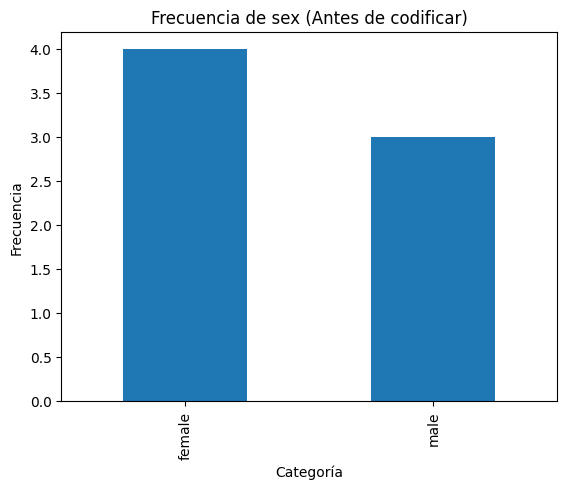

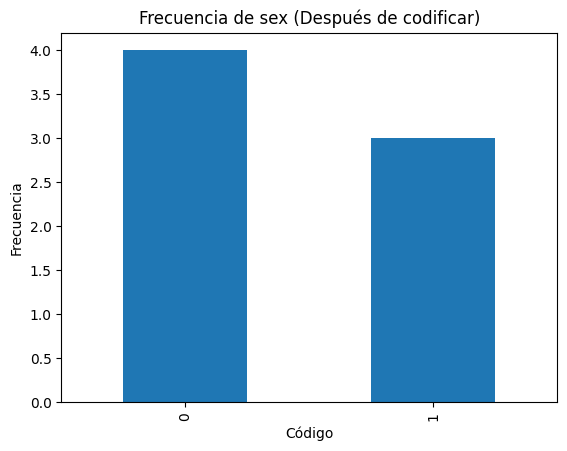

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

data = {'sex': ['male', 'female', 'female', 'male', 'female', 'male', 'female']}
df = pd.DataFrame(data)

label_encoder = LabelEncoder()
df['sex_encoded'] = label_encoder.fit_transform(df['sex'])

freq_before = df['sex'].value_counts()
freq_after = df['sex_encoded'].value_counts()

# Plot before encoding
plt.figure()
freq_before.plot(kind='bar')
plt.title('Frecuencia de sex (Antes de codificar)')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()

# Plot after encoding
plt.figure()
freq_after.plot(kind='bar')
plt.title('Frecuencia de sex (Después de codificar)')
plt.xlabel('Código')
plt.ylabel('Frecuencia')
plt.show()


### 3. Utiliza OneHotEncoder para codificar la columna 'class'. ¿Qué ventajas tiene este enfoque frente a LabelEncoder?

In [13]:
import pandas as pd

# Ejemplo similar al dataset Titanic
data = pd.DataFrame({
    'class': ['First', 'Second', 'Third', 'First', 'Third', 'Second', 'Third']
})

# Aplicar OneHotEncoder con get_dummies
onehot_class = pd.get_dummies(data['class'], prefix='class')

# Mostrar el resultado
print("Datos originales:")
print(data)

print("\nDatos codificados con OneHotEncoder:")
print(onehot_class)

"""OneHotEncoder es más adecuado para la columna 'class' porque evita que el modelo interprete jerarquía entre las clases. Cada categoría es 
independiente y se representa como una columna binaria."""



Datos originales:
    class
0   First
1  Second
2   Third
3   First
4   Third
5  Second
6   Third

Datos codificados con OneHotEncoder:
   class_First  class_Second  class_Third
0         True         False        False
1        False          True        False
2        False         False         True
3         True         False        False
4        False         False         True
5        False          True        False
6        False         False         True


"OneHotEncoder es más adecuado para la columna 'class' porque evita que el modelo interprete jerarquía entre las clases. Cada categoría es \nindependiente y se representa como una columna binaria."

### 4. Si quisieras aplicar un modelo de aprendizaje automático, ¿qué tipo de codificación elegirías para las variables categóricas? Explica tu respuesta.

In [16]:
"""La elección del tipo de codificación depende del tipo de variable categórica y del modelo que se utilizará.

Usaría principalmente OneHotEncoder para variables categóricas nominales si voy a aplicar un modelo de Machine Learning.
Esto se debe a que este método evita introducir un orden numérico falso entre categorías (como lo hace LabelEncoder), lo cual podría confundir al modelo y afectar el aprendizaje.
Solo usaría LabelEncoder o OrdinalEncoder si la variable tiene un orden real (como First, Second, Third Class o niveles educativos)."""

'La elección del tipo de codificación depende del tipo de variable categórica y del modelo que se utilizará.\n\nUsaría principalmente OneHotEncoder para variables categóricas nominales si voy a aplicar un modelo de Machine Learning.\nEsto se debe a que este método evita introducir un orden numérico falso entre categorías (como lo hace LabelEncoder), lo cual podría confundir al modelo y afectar el aprendizaje.\nSolo usaría LabelEncoder o OrdinalEncoder si la variable tiene un orden real (como First, Second, Third Class o niveles educativos).'